In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
test_df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/test.csv")

train_dir = '../input/rsna-2022-cervical-spine-fracture-detection/train_images'
test_dir = '../input/rsna-2022-cervical-spine-fracture-detection/test_images'

In [ ]:
import pydicom as dicom
import numpy as np
import cv2 as cv
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from path import Path
import os 




def load_dicom(path, size = 64):
    try:
        img=dicom.dcmread(path)
        img.PhotometricInterpretation = 'YBR_FULL'
        data=img.pixel_array
        data=data-np.min(data)
        if np.max(data) != 0:
            data=data/np.max(data)
        data=(data*255).astype(np.uint8)        
        return cv2.cvtColor(data.reshape(512, 512), cv2.COLOR_GRAY2RGB)
    except:        
        return np.zeros((512, 512, 3))

In [ ]:
people = sorted(os.listdir(train_dir))
people[:3]

First person has image id '1.2.826.0.1.3680043.10001'

In [ ]:
import glob
import matplotlib.pyplot as plt
image_file = glob.glob("../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.10001/*.dcm")

plt.figure(figsize=(20, 20))

for i in range(24):
    ax = plt.subplot(6, 6, i + 1)
    image_path = image_file[i]
    image = load_dicom(image_path)
    plt.axis('off')   
    plt.imshow(image)


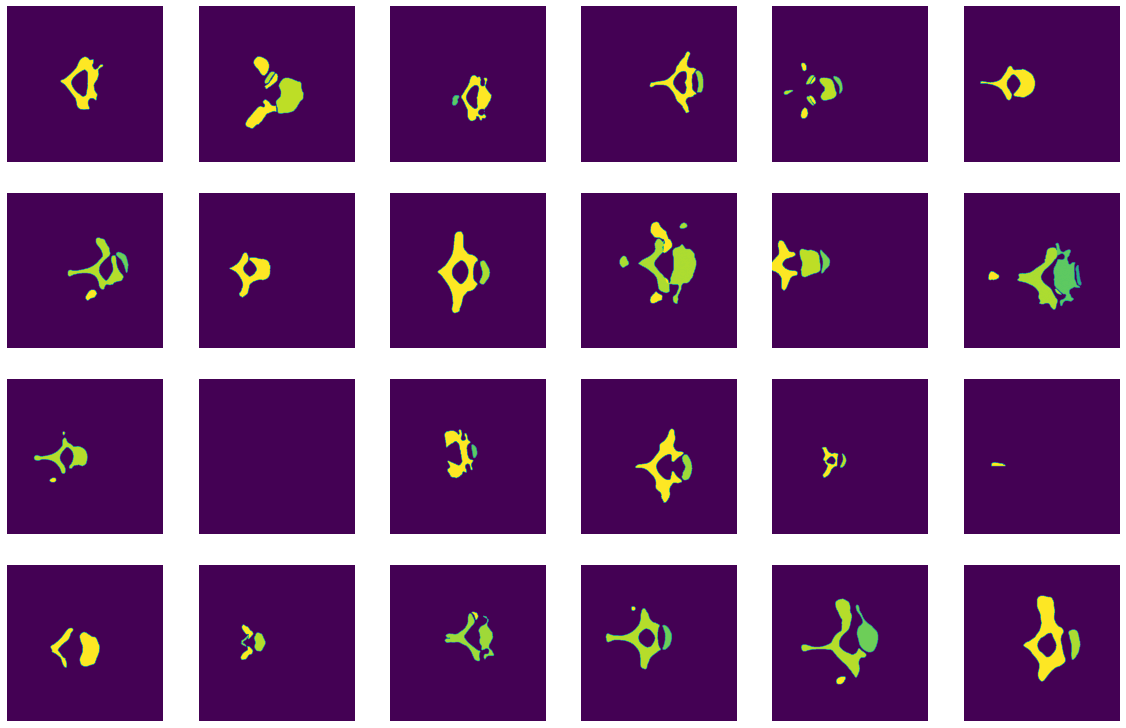

In [18]:
import nibabel as nib

image_file = glob.glob("../input/rsna-2022-cervical-spine-fracture-detection/segmentations/*.nii")
plt.figure(figsize=(20, 20))

for i in range(24):
    ax = plt.subplot(6, 6, i + 1)
    image_path = image_file[i]
    nii_img = nib.load(image_path).get_fdata()
    nib_image = nii_img[:,:,59]
    plt.axis('off')
    plt.imshow(nib_image)